In [6]:

########## Include Packge ##########
library(plyr)
library(ggplot2)


In [7]:
### load data #### 
setwd("C:/Users/Jimny/Desktop/Study/STAT689/Project")
data_w = read.csv("flr_iv_data_gilson.csv",header=TRUE)
head(data_w)
dim(data_w)
names(data_w)

####### data checking ########
## check missing values ####
sum(is.na(data_w))

### drop missing values ###
data_clean <- na.omit(data_w)

data_clean$Gender <-as.character(data_clean$Gender)
str(data_clean$Gender)

Subject,interval,mean_ee,mean_mets,mean_steps,School,Grade,Teacher,Trt_is_1,Gender,Ethnicity,BMI_perc_fall,BMI_perc_spring,raw_bmi_fallyr1,raw_bmi_springyr1,age,bmi_springyr2,raw_bmi_springyr2,delta_yr2,delta_yr1
1,1,0.9842590,2.770173,1.900000,3,2,1,1,2,2,11.7,20.7,14.15346,14.9,8,22.4,14.90412,0.7506648,0.7465406
1,2,0.8332303,2.345106,4.033333,3,2,1,1,2,2,11.7,20.7,14.15346,14.9,8,22.4,14.90412,0.7506648,0.7465406
1,3,1.6552326,4.658612,59.716667,3,2,1,1,2,2,11.7,20.7,14.15346,14.9,8,22.4,14.90412,0.7506648,0.7465406
1,4,1.0765687,3.029977,8.166667,3,2,1,1,2,2,11.7,20.7,14.15346,14.9,8,22.4,14.90412,0.7506648,0.7465406
1,5,1.2317595,3.466757,8.350000,3,2,1,1,2,2,11.7,20.7,14.15346,14.9,8,22.4,14.90412,0.7506648,0.7465406
1,6,1.5965190,4.493364,21.416667,3,2,1,1,2,2,11.7,20.7,14.15346,14.9,8,22.4,14.90412,0.7506648,0.7465406


[1] 7650   20

[1] "Subject"           "interval"          "mean_ee"          
 [4] "mean_mets"         "mean_steps"        "School"           
 [7] "Grade"             "Teacher"           "Trt_is_1"         
[10] "Gender"            "Ethnicity"         "BMI_perc_fall"    
[13] "BMI_perc_spring"   "raw_bmi_fallyr1"   "raw_bmi_springyr1"
[16] "age"               "bmi_springyr2"     "raw_bmi_springyr2"
[19] "delta_yr2"         "delta_yr1"

[1] 9990

 chr [1:4650] "2" "2" "2" "2" "2" "2" "2" "2" "2" "2" "2" "2" "2" "2" "2" ...


In [8]:
#multiplot() for plot multiple plots with ggplot()
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                     ncol = cols, nrow = ceiling(numPlots/cols))
  }

  if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

`geom_smooth()` using method = 'gam'


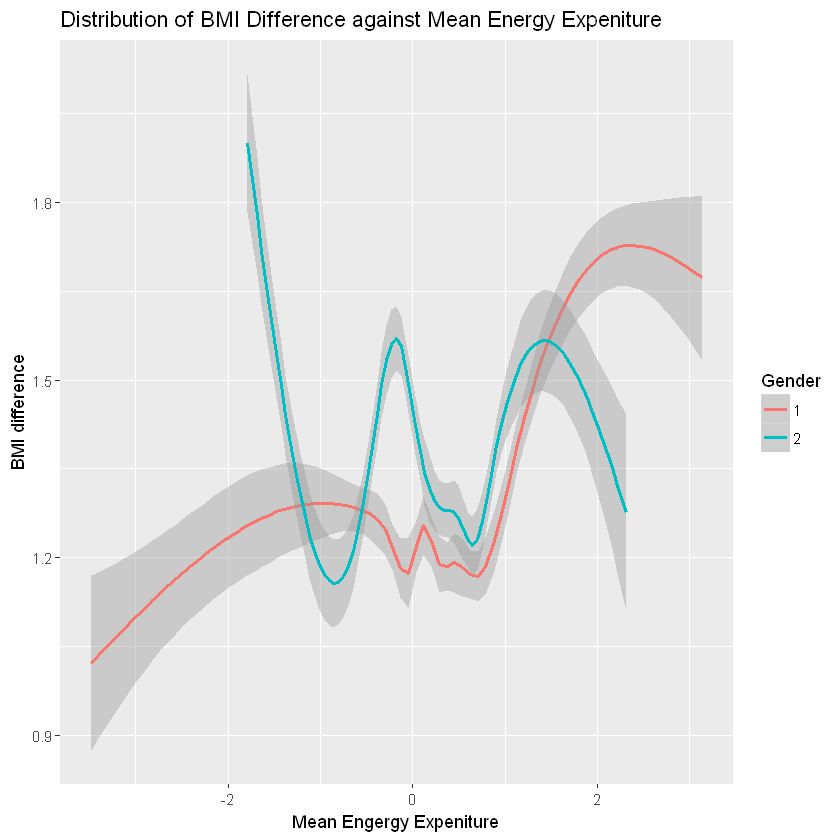

In [9]:
################ BMI vs mean EE stratified by gender #############

qplot( delta_yr1, mean_ee, data=data_clean, geom= "smooth",  color=Gender, 
       main="Distribution of BMI Difference against Mean Energy Expeniture", 
       xlab="Mean Engergy Expeniture", ylab="BMI difference")

`geom_smooth()` using method = 'gam'


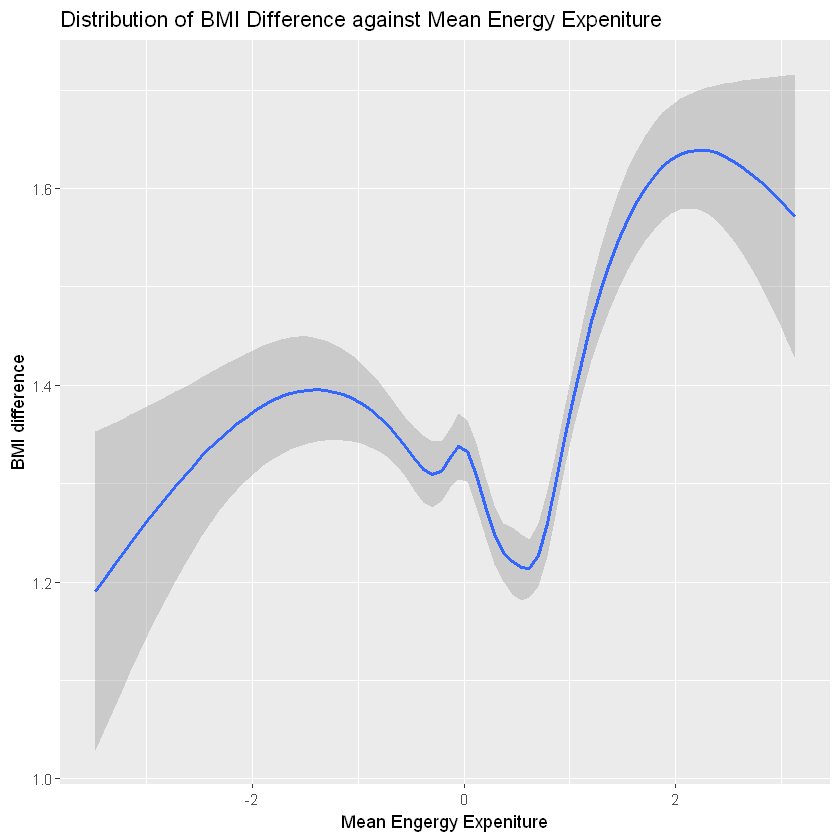

In [10]:
################ general BMI vs mean EE #############
qplot( delta_yr1, mean_ee, data=data_clean, geom= "smooth",
       main="Distribution of BMI Difference against Mean Energy Expeniture", 
       xlab="Mean Engergy Expeniture", ylab="BMI difference")

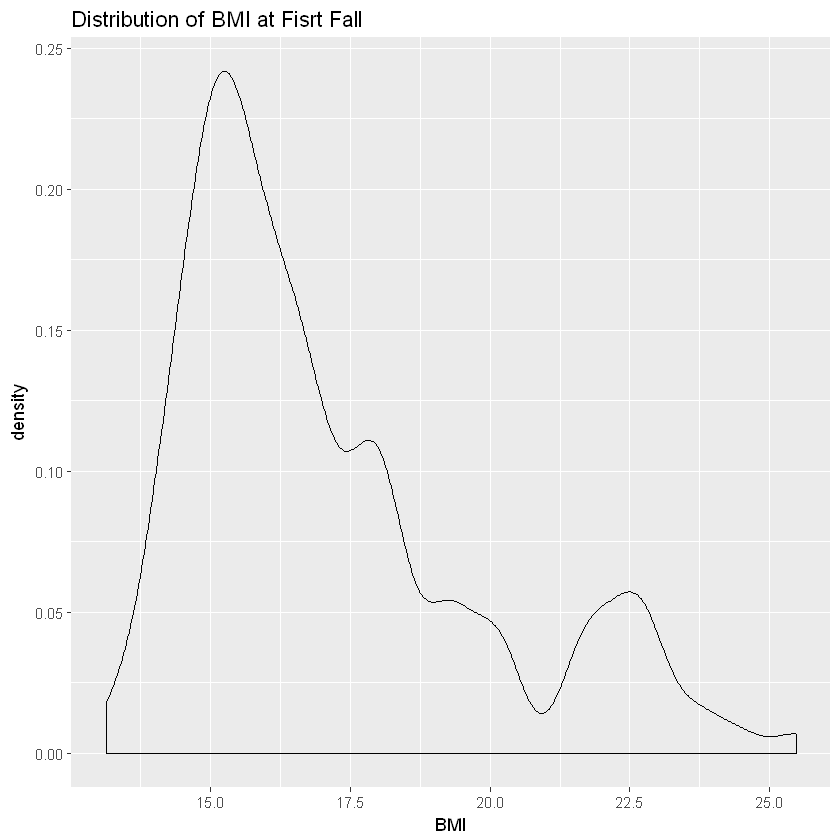

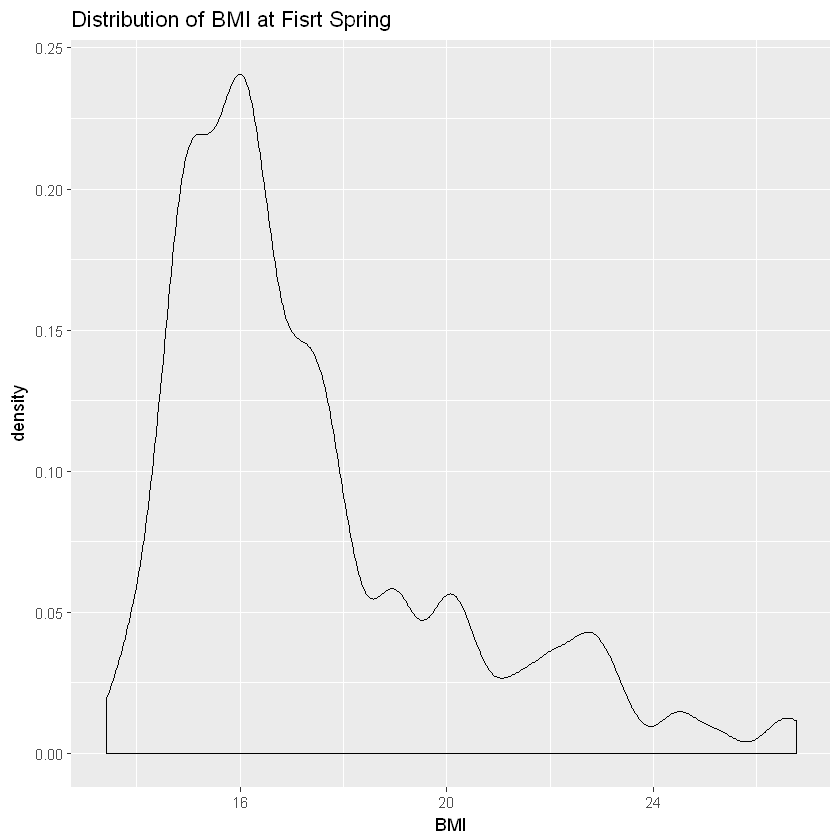

In [11]:
############ density plot of BMI for fall year 1 and spring year1 #########
qplot(raw_bmi_fallyr1, data=data_clean, geom= "density",alpha=I(.5), 
      main="Distribution of BMI at Fisrt Fall", 
      xlab="BMI", ylab="density")

qplot(raw_bmi_springyr1, data=data_clean, geom= "density",alpha=I(.5), 
      main="Distribution of BMI at Fisrt Spring", 
      xlab="BMI", ylab="density")

In [13]:
## Data and plot settings
dev.off()

p <- ggplot(data_clean, aes(factor(meanEELevel), delta_yr1)) +
  labs(list(title = "Chicken weights after six weeks", x = "Energy expeniture", y = "BMI Difference")) +
  theme(axis.title.x = element_text(face="bold"), axis.text.x = element_text(face="bold")) +
  theme(axis.title.y = element_text(face="bold"), axis.text.y = element_text(face="bold"))

p2 <- p + geom_boxplot(outlier.size = 0, coef = 0)
print(p2)


p2 <- p + geom_boxplot(aes(ymin=..lower.., ymax=..upper..), outlier.size=0) 
print(p2)

null device 
          1

ERROR: Error in factor(meanEELevel): object 'meanEELevel' not found
